<a href="https://colab.research.google.com/github/mujtaba86/final-ml/blob/main/newfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Dataset Overview ---
First 5 rows:
   network_packet_size protocol_type  login_attempts  session_duration  \
0                  599           TCP               4        492.983263   
1                  472           TCP               3       1557.996461   
2                  629           TCP               3         75.044262   
3                  804           UDP               4        601.248835   
4                  453           TCP               5        532.540888   

  encryption_used  ip_reputation_score  failed_logins browser_type  \
0             DES             0.606818              1         Edge   
1             DES             0.301569              0      Firefox   
2             DES             0.739164              2       Chrome   
3             DES             0.123267              0      Unknown   
4             AES             0.054874              1      Firefox   

   unusual_time_access  attack_detected  
0                    0                1  
1          

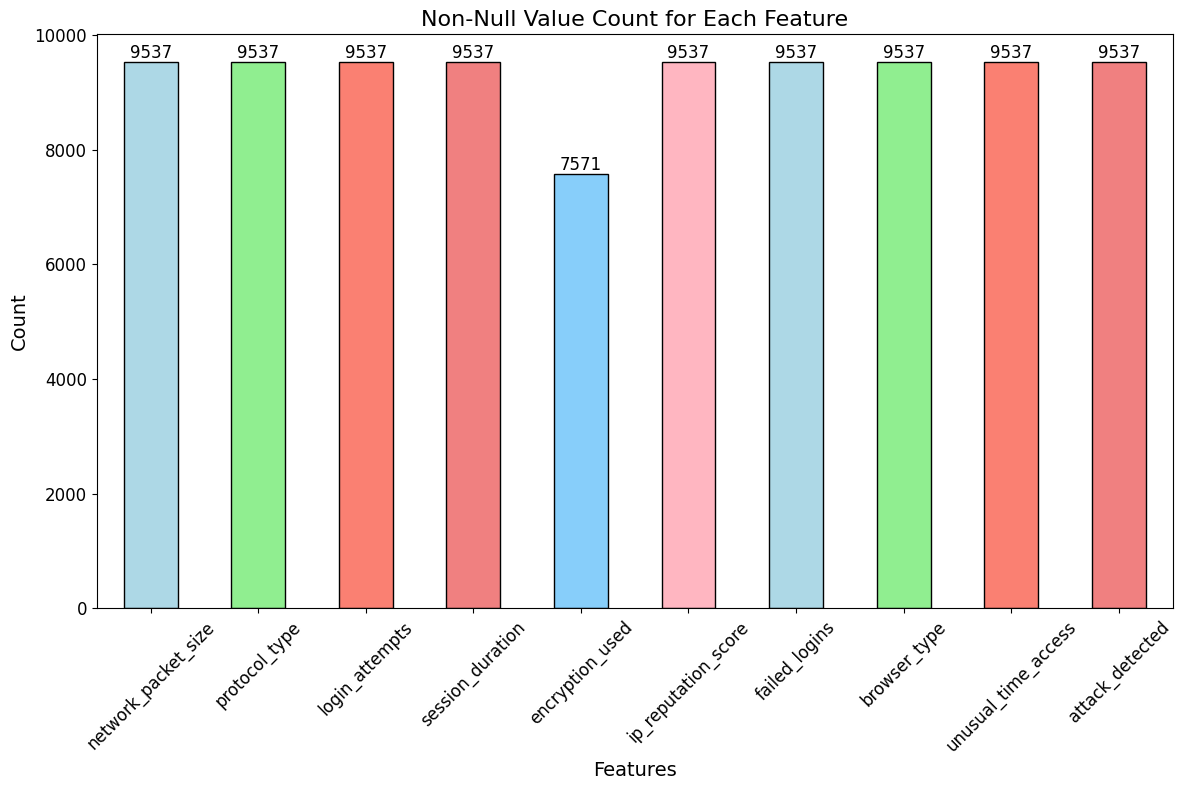

attack_detected
0    5273
1    4264
Name: count, dtype: int64


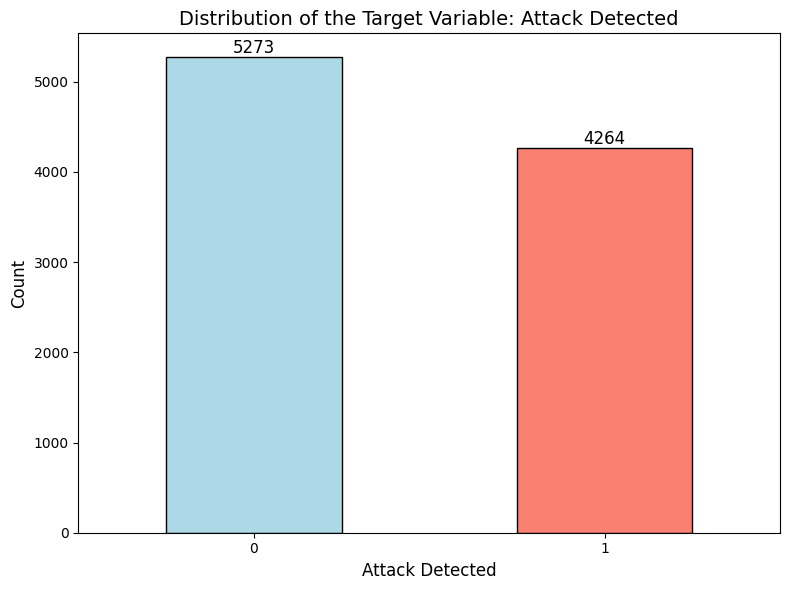

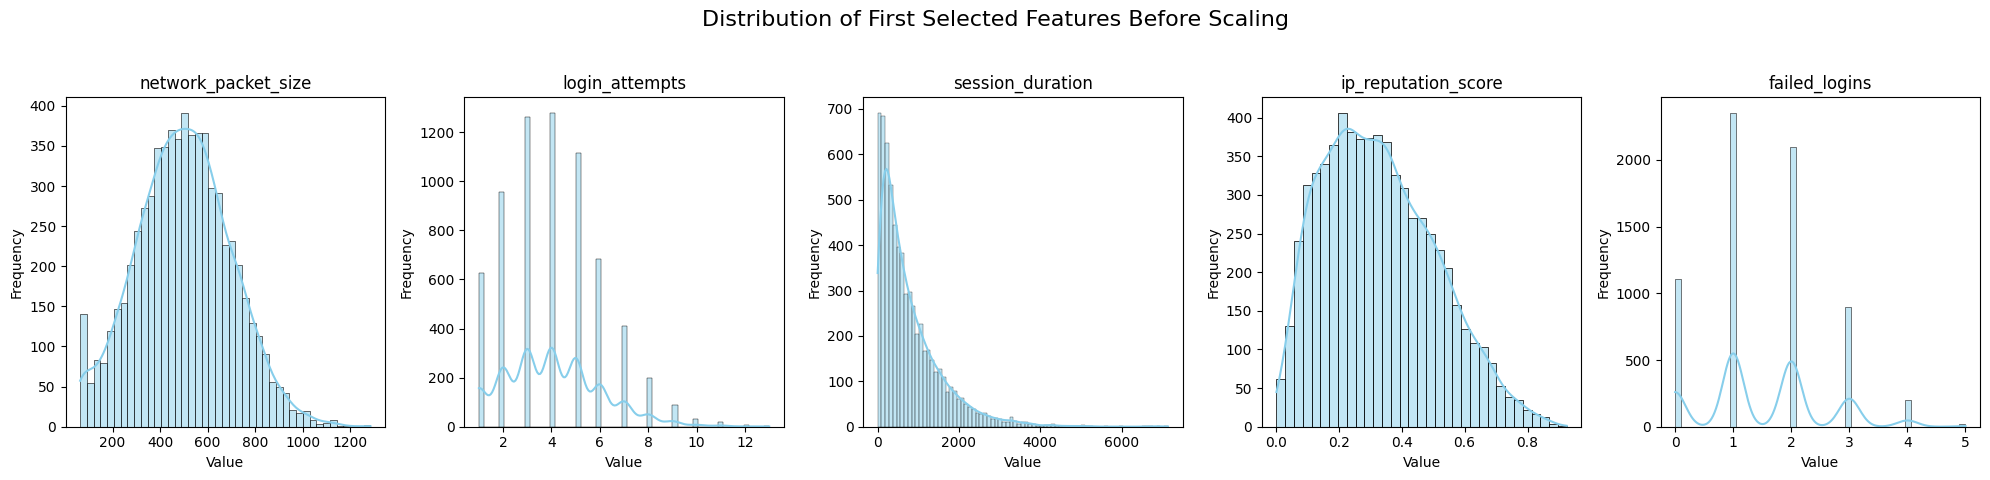

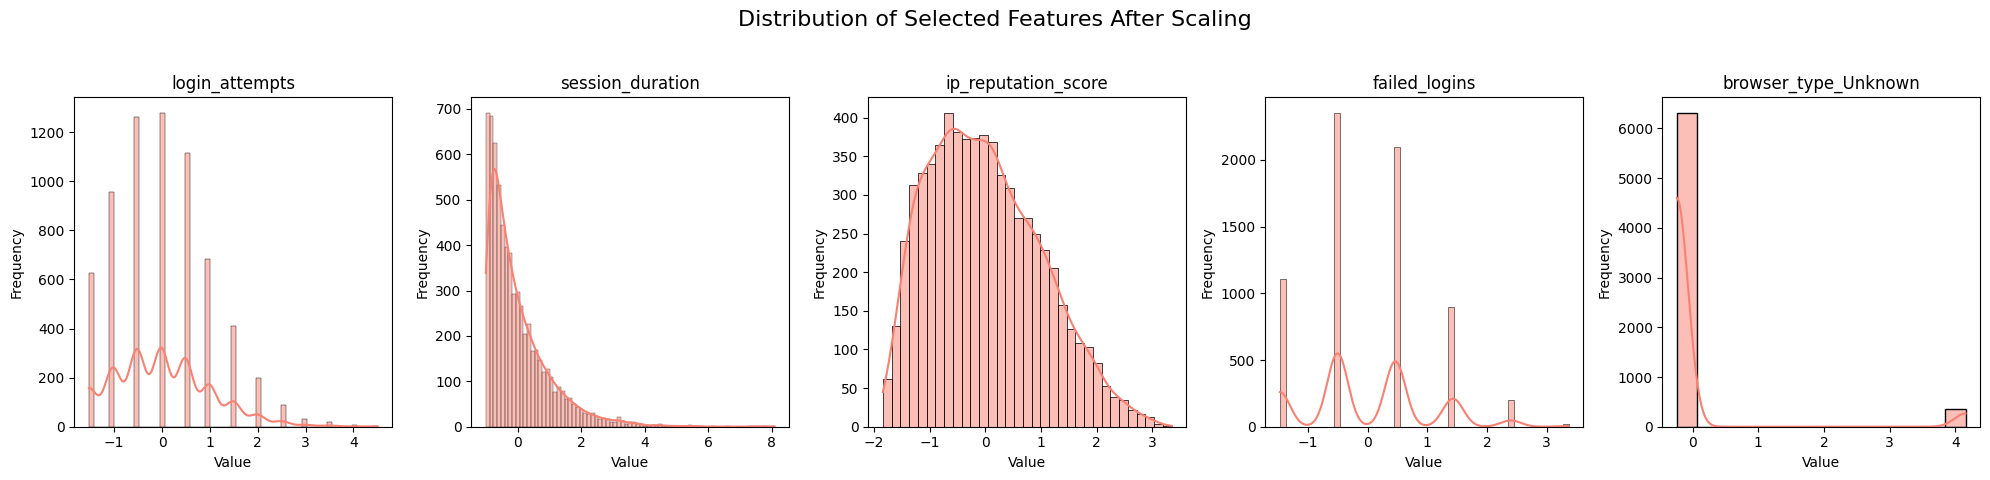


--- KNN with Feature Selection (With FS: True) ---
F1 Score: 0.8172
Accuracy: 0.8519
Precision: 0.9115
Recall: 0.7406
AUC-ROC: 0.8724

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1582
           1       0.91      0.74      0.82      1280

    accuracy                           0.85      2862
   macro avg       0.86      0.84      0.85      2862
weighted avg       0.86      0.85      0.85      2862



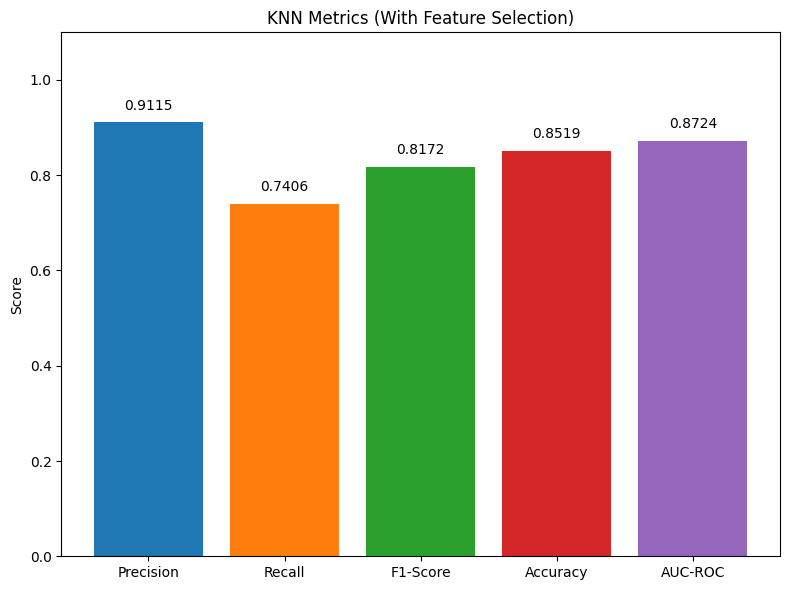

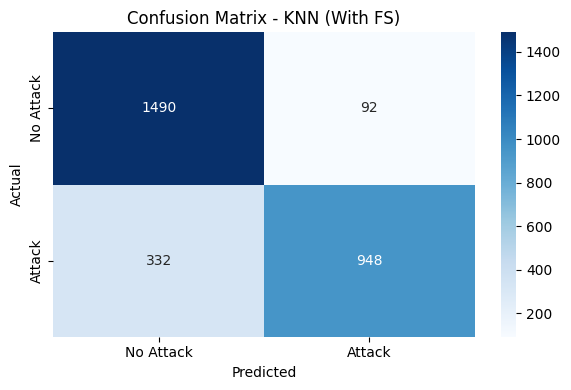


--- KNN without Feature Selection (With FS: False) ---
F1 Score: 0.7296
Accuracy: 0.7900
Precision: 0.8600
Recall: 0.6336
AUC-ROC: 0.8258

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1582
           1       0.86      0.63      0.73      1280

    accuracy                           0.79      2862
   macro avg       0.81      0.78      0.78      2862
weighted avg       0.80      0.79      0.78      2862



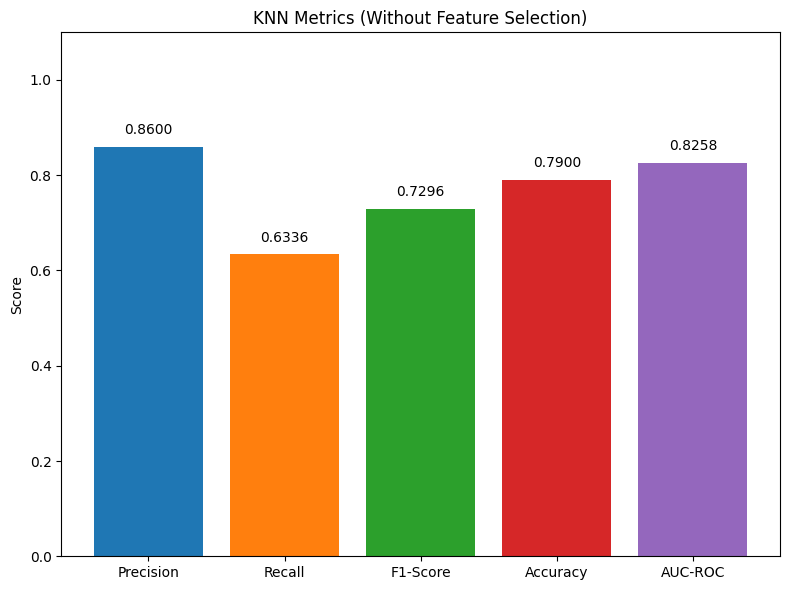

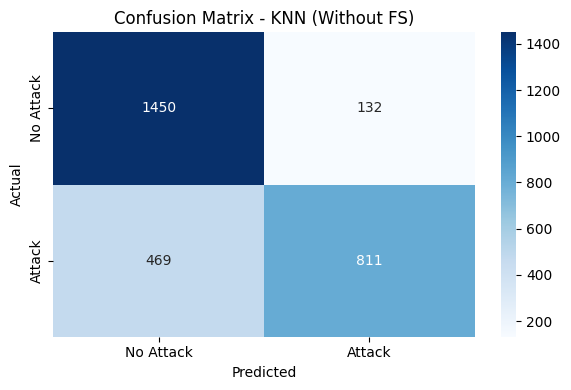


--- Decision Tree with Feature Selection (With FS: True) ---
F1 Score: 0.8024
Accuracy: 0.8249
Precision: 0.8104
Recall: 0.7945
AUC-ROC: 0.8220

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1582
           1       0.81      0.79      0.80      1280

    accuracy                           0.82      2862
   macro avg       0.82      0.82      0.82      2862
weighted avg       0.82      0.82      0.82      2862



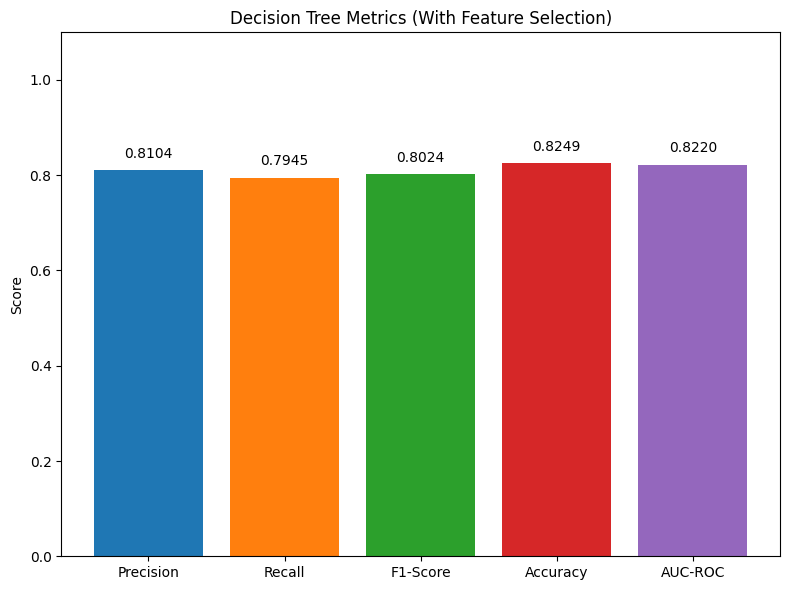

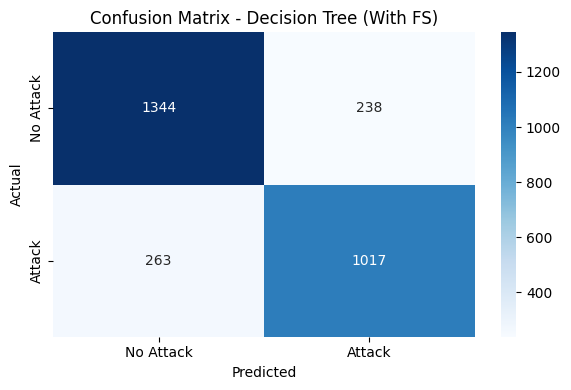


--- Decision Tree without Feature Selection (With FS: False) ---
F1 Score: 0.7936
Accuracy: 0.8166
Precision: 0.7989
Recall: 0.7883
AUC-ROC: 0.8139

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1582
           1       0.80      0.79      0.79      1280

    accuracy                           0.82      2862
   macro avg       0.81      0.81      0.81      2862
weighted avg       0.82      0.82      0.82      2862



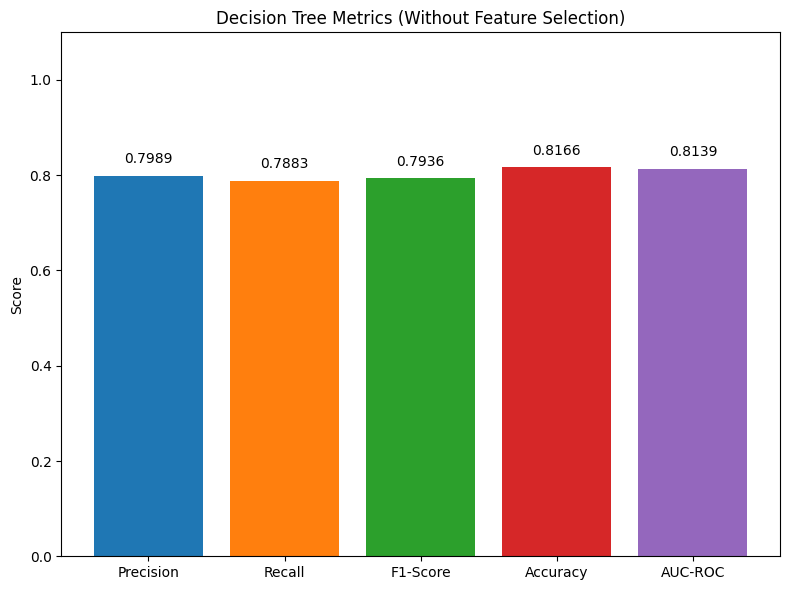

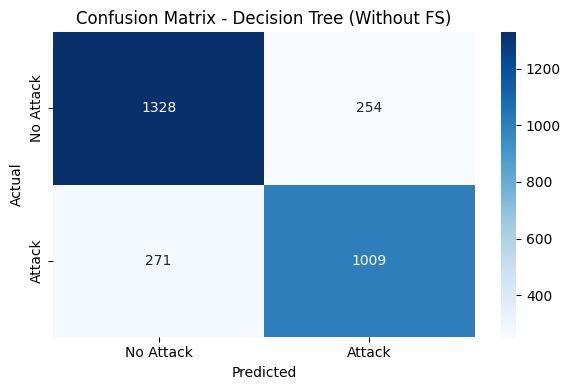


--- Logistic Regression with Feature Selection (With FS: True) ---
F1 Score: 0.6805
Accuracy: 0.7254
Precision: 0.7093
Recall: 0.6539
AUC-ROC: 0.7892

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1582
           1       0.71      0.65      0.68      1280

    accuracy                           0.73      2862
   macro avg       0.72      0.72      0.72      2862
weighted avg       0.72      0.73      0.72      2862



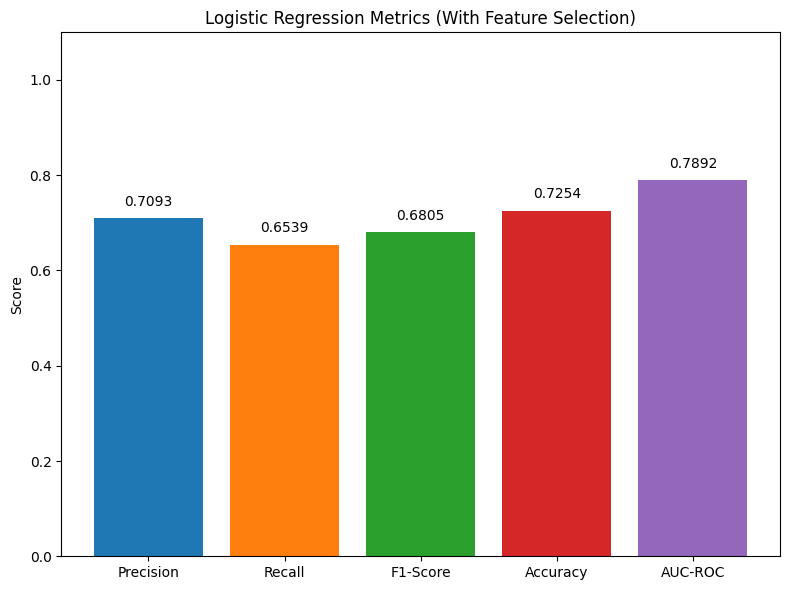

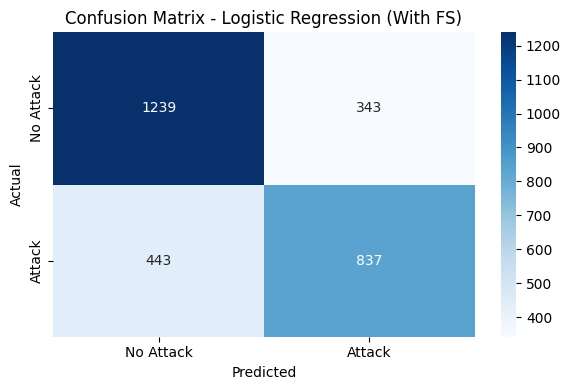


--- Logistic Regression without Feature Selection (With FS: False) ---
F1 Score: 0.6846
Accuracy: 0.7299
Precision: 0.7165
Recall: 0.6555
AUC-ROC: 0.7890

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1582
           1       0.72      0.66      0.68      1280

    accuracy                           0.73      2862
   macro avg       0.73      0.72      0.72      2862
weighted avg       0.73      0.73      0.73      2862



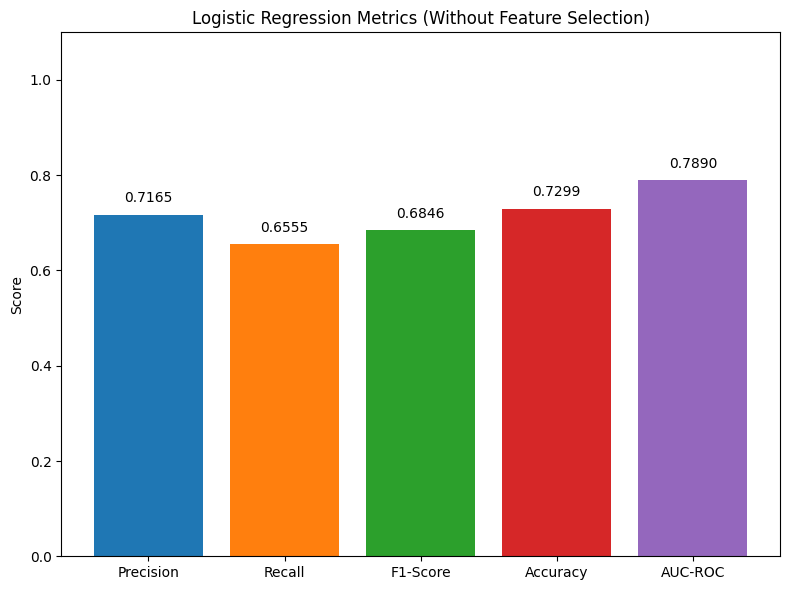

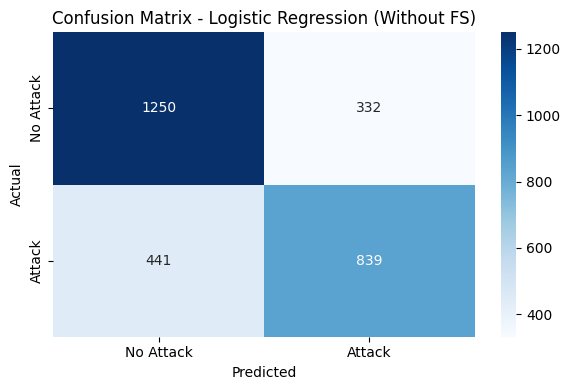

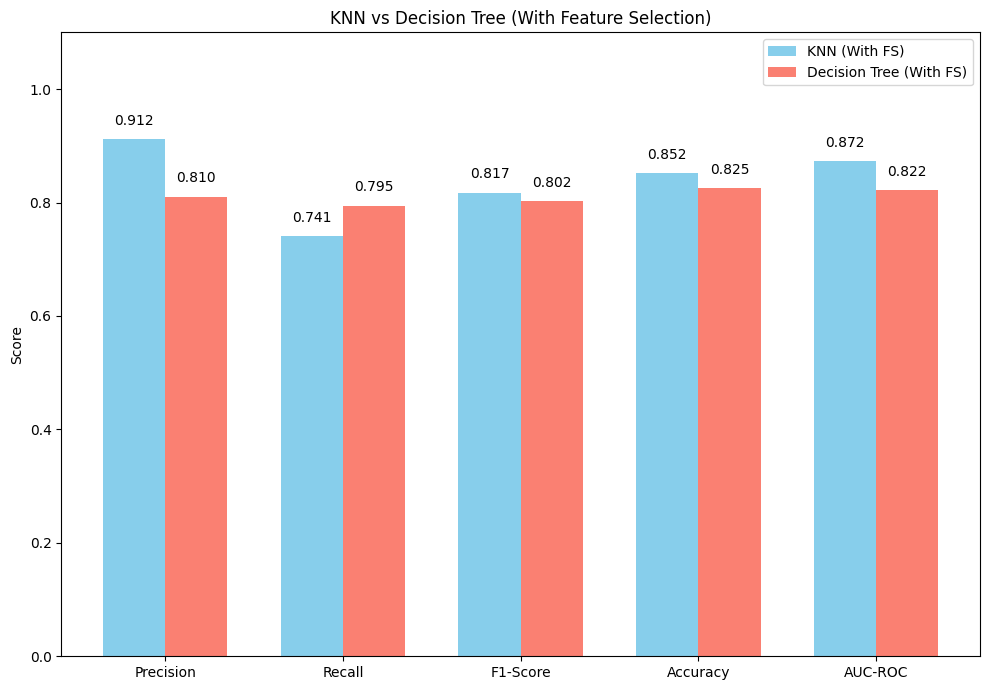

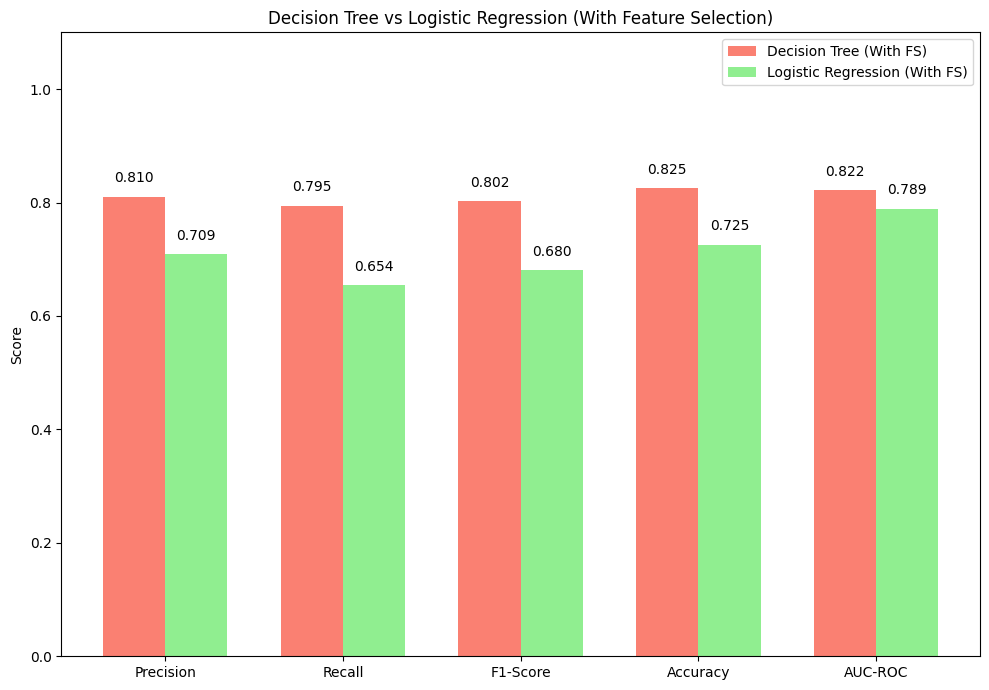

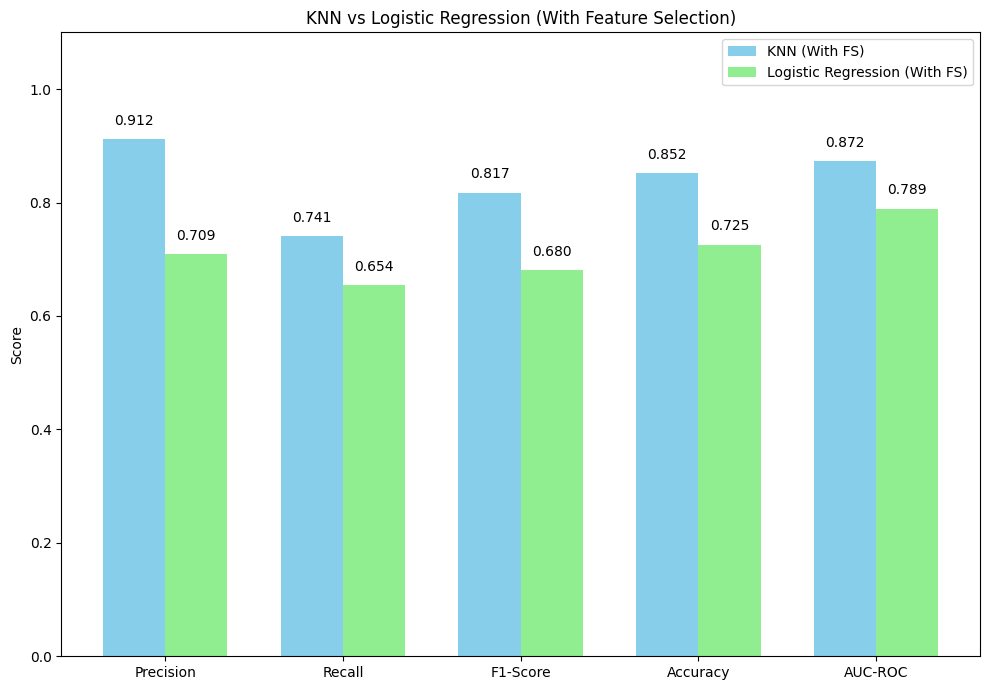

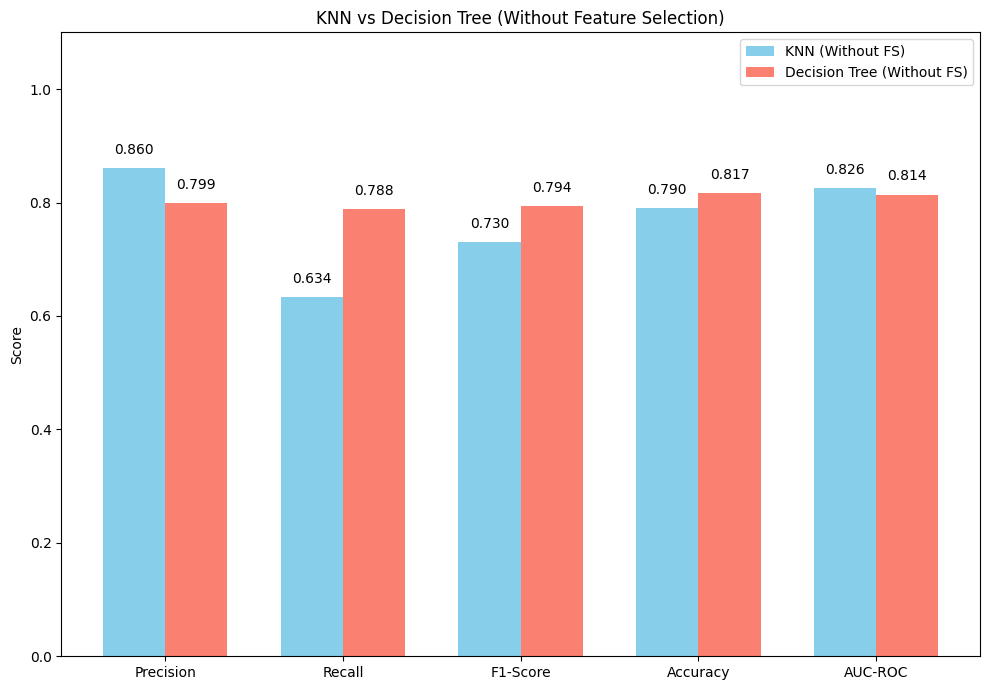

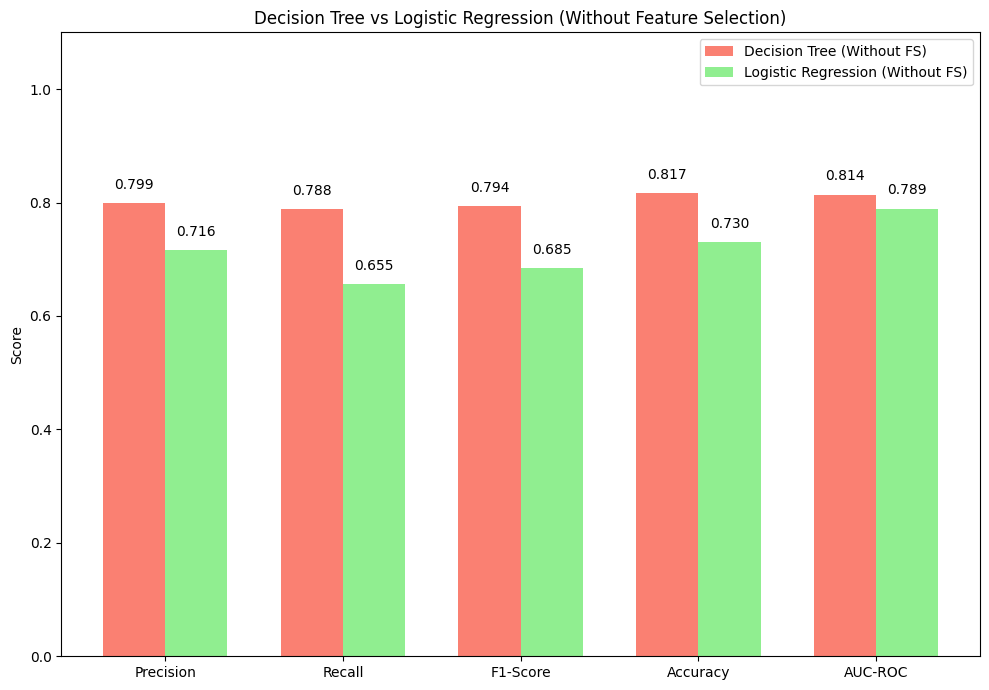

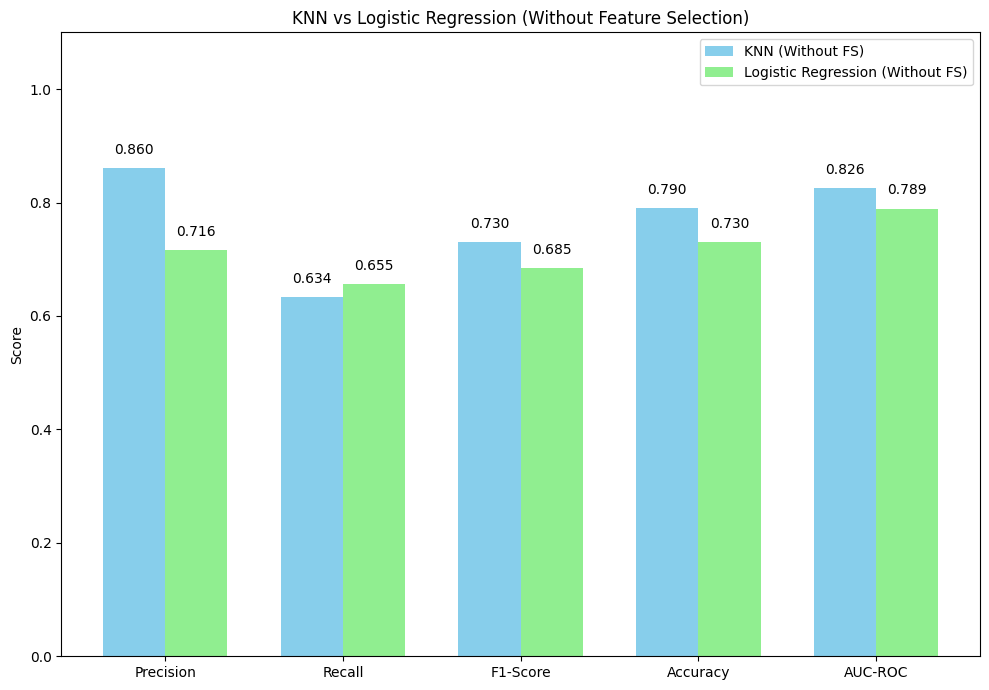

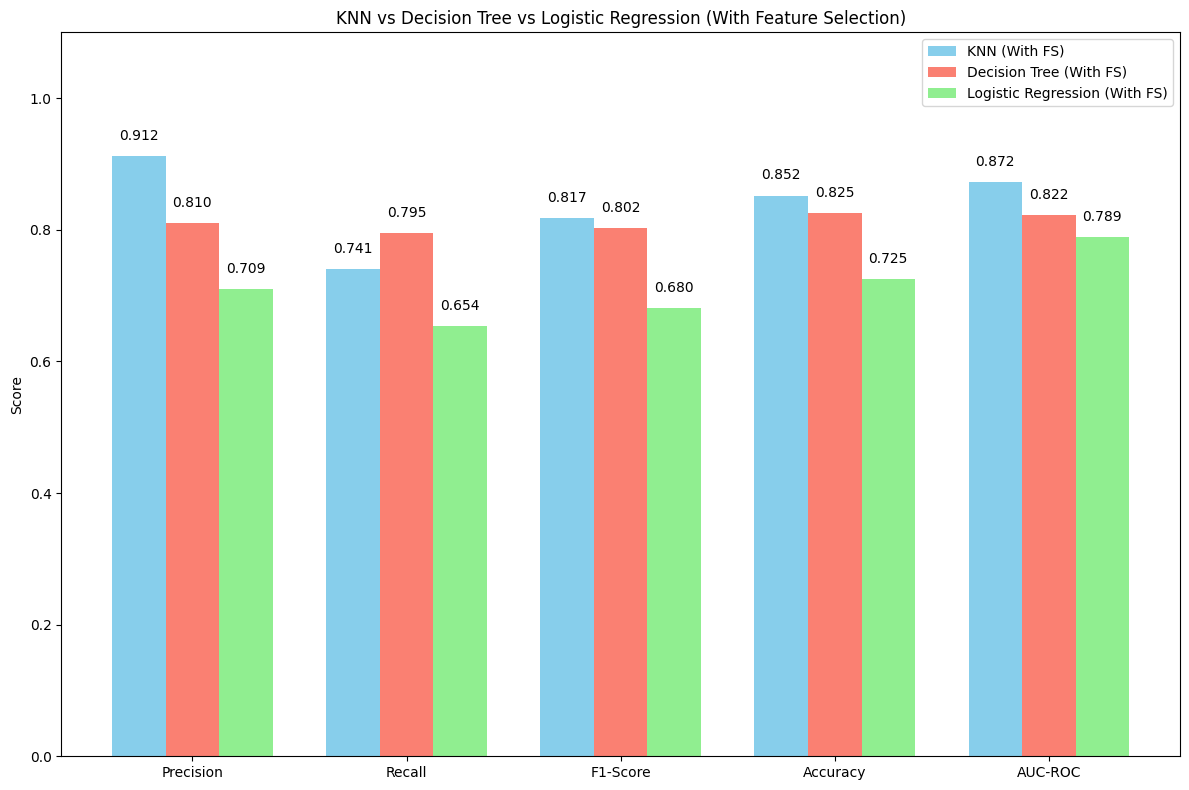

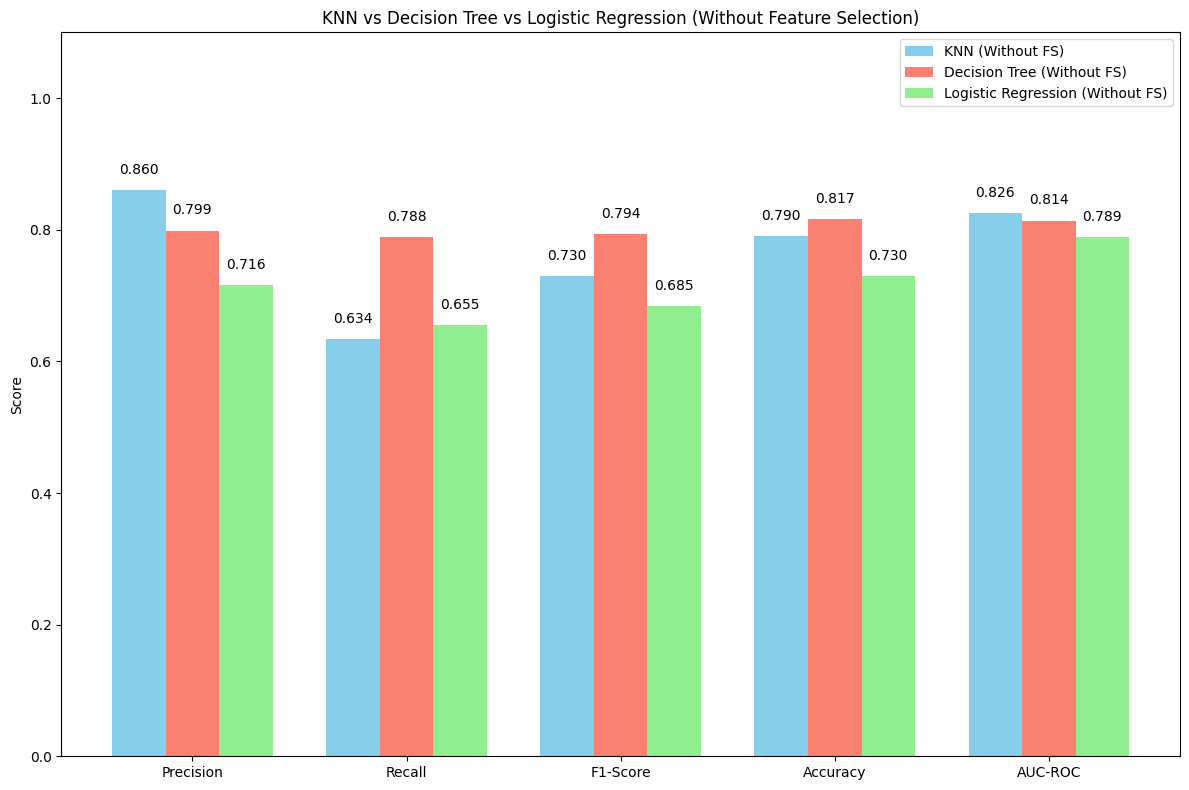

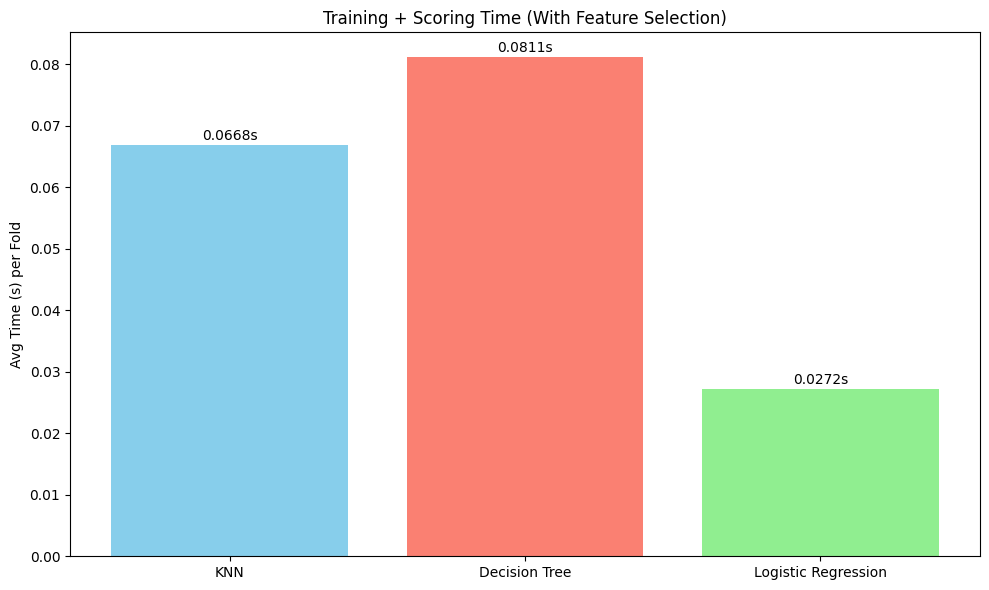

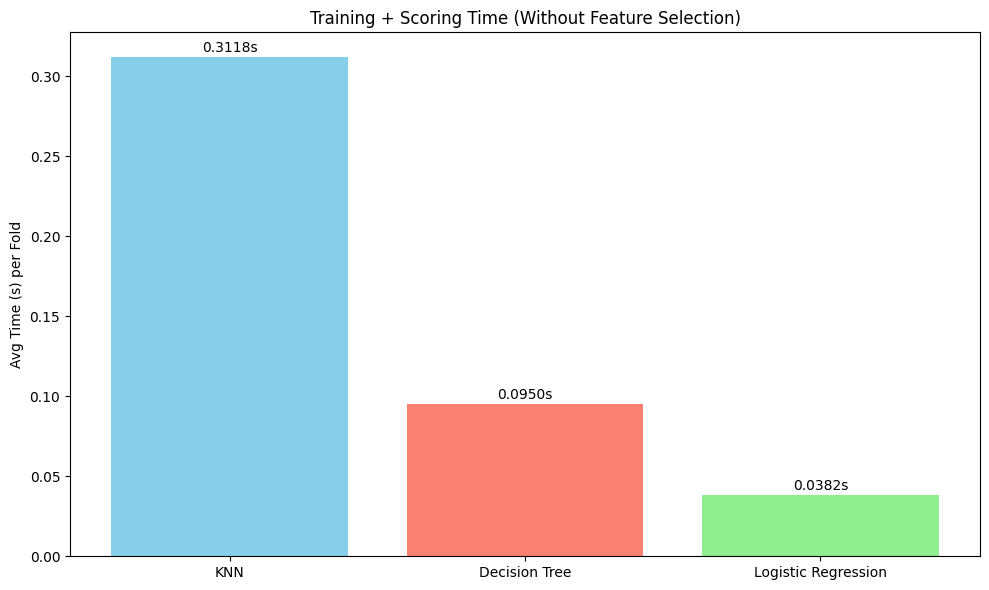

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
import time

# --- Data Loading and Description ---
# Load the dataset from the uploaded file named 'int.csv'
df = pd.read_csv('int.csv')

# Drop the 'session_id' column as it's a unique identifier and not useful for prediction.
df = df.drop('session_id', axis=1)

# Display a brief overview of the dataset.
print("--- Dataset Overview ---")

print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())
print("\nDistribution of the target variable 'attack_detected':")
# Get the count of non-null values for each column (feature)
non_null_counts = df.count()

# Create a bar chart with different colors for each bar
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['lightblue', 'lightgreen', 'salmon', 'lightcoral', 'lightskyblue', 'lightpink']  # Add more colors as needed
bars = non_null_counts.plot(kind='bar', color=colors[:len(non_null_counts)], edgecolor='black', ax=ax)

# Add the total values on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1,  # Positioning the text
             str(int(height)),  # Display the height as an integer
             ha='center', va='bottom', fontsize=12)

# Add plot labels and title
ax.set_title('Non-Null Value Count for Each Feature', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adjust layout to avoid clipping
fig.tight_layout()

# Show the plot without saving it
plt.show()
print(df['attack_detected'].value_counts())
value_counts = df['attack_detected'].value_counts()

# Create the bar plot with different colors for each category
plt.figure(figsize=(8, 6))
colors = ['lightblue', 'salmon']  # Different colors for the bars
bars = value_counts.plot(kind='bar', color=colors, edgecolor='black')

# Add the total values on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,  # Positioning the text
             str(int(height)),  # Display the height as an integer
             ha='center', va='bottom', fontsize=12)

# Set plot labels and title
plt.xlabel('Attack Detected', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of the Target Variable: Attack Detected', fontsize=14)

# Show plot
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.tight_layout()  # Adjusts layout to fit everything
plt.show()



# --- Data Preprocessing ---
# Convert categorical features into a numerical format using one-hot encoding.
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate the features (X) from the target variable (y).
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Split the data into training (70%) and testing (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# --- Define Reusable Components and Functions ---
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}
model_colors = {'KNN': 'skyblue', 'Decision Tree': 'salmon', 'Logistic Regression': 'lightgreen'}
k_best_count = 5
selector = SelectKBest(score_func=chi2, k=k_best_count)
scaler = StandardScaler()
metrics_labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC-ROC']
metrics_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

def evaluate_model_and_print(model, X_data, y_true, title, with_fs):
    """Evaluates a model, prints the report, and plots a confusion matrix."""
    y_pred = model.predict(X_data)
    report = classification_report(y_true, y_pred, output_dict=True)
    y_pred_prob = model.predict_proba(X_data)[:, 1] if hasattr(model, 'predict_proba') else None

    metrics = {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1': f1_score(y_true, y_pred),
        'accuracy': accuracy_score(y_true, y_pred),
        'auc_roc': roc_auc_score(y_true, y_pred_prob) if y_pred_prob is not None else np.nan,
        'y_pred': y_pred
    }

    print(f"\n--- {title} (With FS: {with_fs}) ---")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"AUC-ROC: {metrics['auc_roc']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    return metrics

def plot_single_model_metrics(metrics, title):
    """Generates a bar chart with different colors for each metric."""
    plt.figure(figsize=(8, 6))
    bars = plt.bar(metrics_labels, list(metrics.values())[:-1], color=metrics_colors)
    for bar, value in zip(bars, list(metrics.values())[:-1]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{value:.4f}", ha='center', va='bottom')
    plt.title(title)
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    """Generates a heatmap for the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# --- Feature Selection and Scaling ---
# --- Feature Selection and Scaling ---

# Plot distributions before scaling (using first k_best_count features for clarity)
df_before_scaling = pd.DataFrame(X_train.iloc[:, :k_best_count], columns=X.columns[:k_best_count])
fig, axes = plt.subplots(nrows=1, ncols=k_best_count, figsize=(20, 5))
fig.suptitle('Distribution of First Selected Features Before Scaling', fontsize=16)
for i, col in enumerate(df_before_scaling.columns):
    sns.histplot(df_before_scaling[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('before_scaling.png')
plt.show()  # <-- added to display
plt.close(fig)

# Fit selector on training data only
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

# Scale all data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale feature-selected data
X_train_kbest_scaled = scaler.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler.transform(X_test_kbest)

# Plot distributions after scaling (selected features)
df_after_scaling = pd.DataFrame(X_train_kbest_scaled, columns=np.array(X.columns)[selector.get_support()])
fig, axes = plt.subplots(nrows=1, ncols=k_best_count, figsize=(20, 5))
fig.suptitle('Distribution of Selected Features After Scaling', fontsize=16)
for i, col in enumerate(df_after_scaling.columns):
    sns.histplot(df_after_scaling[col], kde=True, ax=axes[i], color='salmon')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('after_scaling.png')
plt.show()  # <-- added to display
plt.close(fig)



# --- Model Training and Evaluation Loop ---
all_results = {}
for name, model in models.items():
    # --- With Feature Selection ---
    X_train_fs = X_train_kbest_scaled if name in ['KNN', 'Logistic Regression'] else X_train_kbest
    X_test_fs = X_test_kbest_scaled if name in ['KNN', 'Logistic Regression'] else X_test_kbest

    model.fit(X_train_fs, y_train)
    results_fs = evaluate_model_and_print(model, X_test_fs, y_test, f"{name} with Feature Selection", True)
    all_results[f'{name}_FS'] = results_fs
    plot_single_model_metrics(results_fs, f"{name} Metrics (With Feature Selection)")
    plot_confusion_matrix(y_test, results_fs['y_pred'], f"Confusion Matrix - {name} (With FS)")

    # --- Without Feature Selection ---
    X_train_no_fs = X_train_scaled if name in ['KNN', 'Logistic Regression'] else X_train
    X_test_no_fs = X_test_scaled if name in ['KNN', 'Logistic Regression'] else X_test

    model.fit(X_train_no_fs, y_train)
    results_no_fs = evaluate_model_and_print(model, X_test_no_fs, y_test, f"{name} without Feature Selection", False)
    all_results[f'{name}_no_FS'] = results_no_fs
    plot_single_model_metrics(results_no_fs, f"{name} Metrics (Without Feature Selection)")
    plot_confusion_matrix(y_test, results_no_fs['y_pred'], f"Confusion Matrix - {name} (Without FS)")

# --- Final Model Comparison Functions ---
def plot_pair_comparison(model1_name, model2_name, with_fs):
    """Plots a grouped bar chart for two models."""
    label1 = f'{model1_name} ({"With FS" if with_fs else "Without FS"})'
    label2 = f'{model2_name} ({"With FS" if with_fs else "Without FS"})'
    title = f'{model1_name} vs {model2_name} ({"With" if with_fs else "Without"} Feature Selection)'
    metrics1 = list(all_results[f'{model1_name}_{"FS" if with_fs else "no_FS"}'].values())[:-1]
    metrics2 = list(all_results[f'{model2_name}_{"FS" if with_fs else "no_FS"}'].values())[:-1]

    width = 0.35
    x = np.arange(len(metrics_labels))
    fig, ax = plt.subplots(figsize=(10, 7))
    bars1 = ax.bar(x - width / 2, metrics1, width, label=label1, color=model_colors[model1_name])
    bars2 = ax.bar(x + width / 2, metrics2, width, label=label2, color=model_colors[model2_name])
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_labels)
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.1)
    ax.legend()
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{height:.3f}", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

def plot_all_comparison(with_fs):
    """Compares all three models in a grouped bar chart."""
    suffix = 'FS' if with_fs else 'no_FS'
    title = f'KNN vs Decision Tree vs Logistic Regression ({"With" if with_fs else "Without"} Feature Selection)'

    metrics_knn = list(all_results[f'KNN_{suffix}'].values())[:-1]
    metrics_dt = list(all_results[f'Decision Tree_{suffix}'].values())[:-1]
    metrics_lr = list(all_results[f'Logistic Regression_{suffix}'].values())[:-1]

    metrics_list = [metrics_knn, metrics_dt, metrics_lr]
    labels = ['KNN', 'Decision Tree', 'Logistic Regression']
    colors = [model_colors['KNN'], model_colors['Decision Tree'], model_colors['Logistic Regression']]

    width = 0.25
    x = np.arange(len(metrics_labels))
    fig, ax = plt.subplots(figsize=(12, 8))

    bars = []
    for i, metrics in enumerate(metrics_list):
        bars.append(ax.bar(x + i * width - width, metrics, width, label=f'{labels[i]} ({"With FS" if with_fs else "Without FS"})', color=colors[i]))

    ax.set_xticks(x)
    ax.set_xticklabels(metrics_labels)
    ax.set_title(title)
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.1)
    ax.legend()

    for bar_group in bars:
        for bar in bar_group:
            h = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, h + 0.02, f"{h:.3f}", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# --- Plotting Pairwise Comparisons ---
plot_pair_comparison('KNN', 'Decision Tree', True)
plot_pair_comparison('Decision Tree', 'Logistic Regression', True)
plot_pair_comparison('KNN', 'Logistic Regression', True)
plot_pair_comparison('KNN', 'Decision Tree', False)
plot_pair_comparison('Decision Tree', 'Logistic Regression', False)
plot_pair_comparison('KNN', 'Logistic Regression', False)

# --- Plotting All Models Together ---
plot_all_comparison(with_fs=True)
plot_all_comparison(with_fs=False)


# --- Time Analysis using Pipelines and Cross-Validation ---
# Pipelines simplify the workflow and prevent data leakage, especially with cross-validation.
pipelines_with_fs = {
    'KNN': Pipeline([('select', selector), ('scale', scaler), ('clf', models['KNN'])]),
    'Decision Tree': Pipeline([('select', selector), ('clf', models['Decision Tree'])]),
    'Logistic Regression': Pipeline([('select', selector), ('scale', scaler), ('clf', models['Logistic Regression'])]),
}

pipelines_without_fs = {
    'KNN': Pipeline([('scale', scaler), ('clf', models['KNN'])]),
    'Decision Tree': Pipeline([('clf', models['Decision Tree'])]),
    'Logistic Regression': Pipeline([('scale', scaler), ('clf', models['Logistic Regression'])]),
}

def calculate_avg_time(pipelines, X, y):
    """Calculates average fit and score time for pipelines using cross-validation."""
    times = {}
    for name, pipe in pipelines.items():
        cv_results = cross_validate(pipe, X, y, cv=5, scoring='f1', n_jobs=-1)
        avg_time = np.mean(cv_results['fit_time'] + cv_results['score_time'])
        times[name] = avg_time
    return times

# Get the average times for both with and without feature selection
times_with_fs = calculate_avg_time(pipelines_with_fs, X, y)
times_without_fs = calculate_avg_time(pipelines_without_fs, X, y)

# --- Plot the comparison of training + scoring times ---
def plot_time_comparison(times_dict, title, colors):
    """Plots a bar chart for model training times."""
    labels = list(times_dict.keys())
    durations = [times_dict[n] for n in labels]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, durations, color=colors)
    for bar, t in zip(bars, durations):
        plt.text(bar.get_x() + bar.get_width() / 2, t + max(durations) * 0.01, f"{t:.4f}s", ha='center')
    plt.ylabel('Avg Time (s) per Fold')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_time_comparison(times_with_fs, 'Training + Scoring Time (With Feature Selection)', [model_colors['KNN'], model_colors['Decision Tree'], model_colors['Logistic Regression']])
plot_time_comparison(times_without_fs, 'Training + Scoring Time (Without Feature Selection)', [model_colors['KNN'], model_colors['Decision Tree'], model_colors['Logistic Regression']])